# Cris Working Notebook
___

# 1.10 Friday - Data Mapping

In [1]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv")
labels = pd.read_csv("train_labels.csv")
specs = pd.read_csv("specs.csv")

In [ ]:
print(f"dataset: {len(train)}")
print(f"event_id: {len(train.event_id)}")
print(f"game_session: {len(train.game_session)}")
print(" ")
print(f"unique event_codes: {len(train.event_code.unique())}")
print(f"unique title: {len(train.title.unique())}")

In [ ]:
train.head()

In [ ]:
train[train.world == "MAGMAPEAK"].groupby(["type","title"])["world"].count()

In [ ]:
magma = train[train.world == "MAGMAPEAK"]

In [ ]:
print(f"{train.type.value_counts()}")
print(len(train.event_id))

In [ ]:
len(train.event_id.unique())

In [ ]:
len(train.title.unique())

In [ ]:
len(train.event_code.unique())

In [ ]:
train.event_code.value_counts()

In [ ]:
bdf = pd.merge(train,specs,on="event_id")

In [ ]:
df = bdf[["event_code","event_id","info"]].sample(100_000)

In [ ]:
df[df.event_code==4035]

In [ ]:
labels.head()

---

# 1.13 Monday - Hypothesis Testing

## Summary of Insights:
1. There's a Very Weak Negative Correlation between the no. of assessments taken by a user, and their average accuracy.
 - This tells me that the accuracy is not about the amount of times assessments are taken.
 - There are distinct low, average, high performers - why?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle

## Are the of Assessment Taken and Average Accuracy Correlated to Each Other?

### Look at data

In [3]:
big = wrangle.get_assessment_users()

In [34]:
big.head(10)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
5,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:18.474000+00:00,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
6,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:19.365000+00:00,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
7,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06 04:58:21.490000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,6,3110,6954,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
8,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:22.732000+00:00,"{""coordinates"":{""x"":809,""y"":180,""stage_width"":...",0006a69f,7,4070,8187,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
9,5e812b27,2b9d5af79bcdb79f,2019-08-06 04:58:23.295000+00:00,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",0006a69f,8,4030,8745,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [4]:
print("Accuracy Measures:")
sorted(big.accuracy.unique())

Accuracy Measures:


[nan,
 0.0,
 0.024390243902439025,
 0.025,
 0.03448275862068965,
 0.037037037037037035,
 0.04,
 0.041666666666666664,
 0.043478260869565216,
 0.045454545454545456,
 0.047619047619047616,
 0.05,
 0.05263157894736842,
 0.05555555555555555,
 0.05882352941176471,
 0.0625,
 0.06666666666666668,
 0.07142857142857142,
 0.07692307692307693,
 0.08333333333333333,
 0.09090909090909093,
 0.1,
 0.1111111111111111,
 0.125,
 0.14285714285714285,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.5,
 1.0]

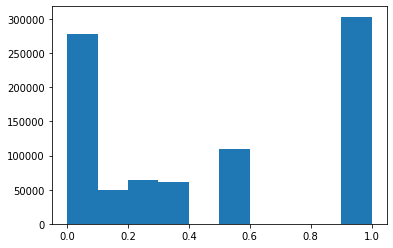

In [5]:
plt.hist(x="accuracy",data=big)
plt.show()

In [6]:
print(f"no. of unique installation ids: {len(big.installation_id.unique())}")

no. of unique installation ids: 3614


### Trim data for analysis

In [43]:
assessment = big.groupby("installation_id")["accuracy_group"].agg(["count","mean"])

In [44]:
assessment.head()

,count,mean
installation_id,,
0006a69f,244,1.758197
0006c192,340,1.388235
00129856,40,3.000000
001d0ed0,194,1.432990
00225f67,37,0.000000


In [45]:
assessment.columns

Index(['count', 'mean'], dtype='object')

In [46]:
assessment.columns = ["no_assessment","ave_accuracy"]
assessment.head()

,no_assessment,ave_accuracy
installation_id,,
0006a69f,244,1.758197
0006c192,340,1.388235
00129856,40,3.000000
001d0ed0,194,1.432990
00225f67,37,0.000000


In [47]:
assessment.describe()

,no_assessment,ave_accuracy
count,3614.000000,3614.000000
mean,239.470670,1.707530
std,347.777106,0.999410
min,6.000000,0.000000
25%,65.000000,1.000000
50%,139.000000,1.741090
75%,280.000000,2.649942
max,7395.000000,3.000000


In [81]:
#get_iqr
q1 = assessment.no_assessment.quantile(0.25)
q3 = assessment.no_assessment.quantile(0.75)
iqr = q3 - q1

upper_fence = q3 + 3 * iqr

filtered = assessment[assessment.no_assessment < upper_fence]

In [82]:
filtered.describe()

,no_assessment,ave_accuracy
count,3484.000000,3484.000000
mean,192.035591,1.718778
std,180.327941,1.010365
min,6.000000,0.000000
25%,62.000000,1.000000
50%,132.000000,1.776089
75%,261.000000,2.691104
max,924.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c044fd0>]],
      dtype=object)

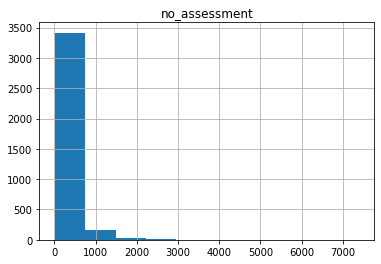

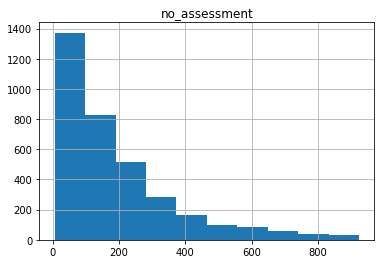

In [83]:
assessment.hist(column="no_assessment")
filtered.hist(column="no_assessment")

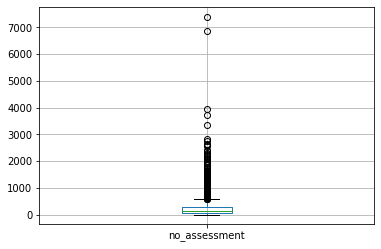

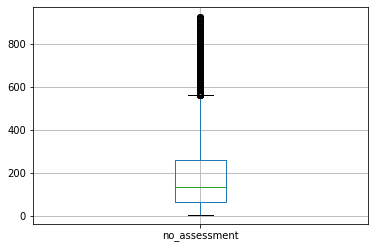

In [68]:
assessment.boxplot(column="no_assessment")
plt.show()
filtered.boxplot(column="no_assessment")
plt.show()

Text(0, 0.5, 'Ave Accuracy')

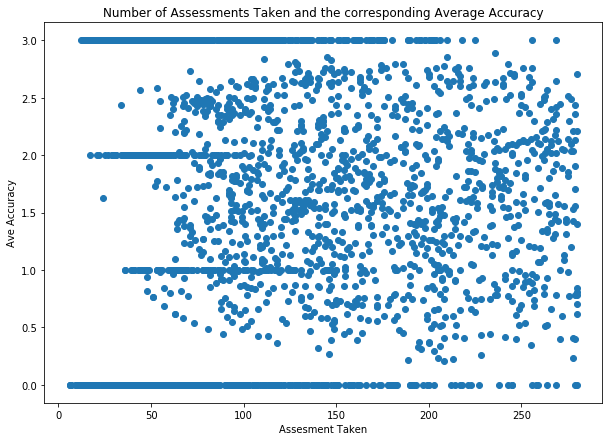

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(x="no_assessment",y="ave_accuracy",data=filtered[filtered.no_assessment <= 280])

plt.title("Number of Assessments Taken and the corresponding Average Accuracy")
plt.xlabel("Assesment Taken")
plt.ylabel("Ave Accuracy")

It seems like there are distinct low, average, high performers, that the amount of assessments they take does not matter. From the visualization, it does not seem like there is a correlation between the total no. of assessments taken, and the average accuracy. Nevertheless, let's do some statistical test to prove this.

There is more variability when the users take more assessments.

### Plan:
1. Take 10 random samples and get the pearson's r for the two variables, `no_assessment` and `ave_accuracy`.
    - Get 1084 observations per sample, which is 30% of the population (3614)
2. Get the mean of the pearson's r of these 5 random samples to see the strength of correlation.

In [70]:
s1 = filtered.sample(frac=.20)
s2 = filtered.sample(frac=.30)
s3 = filtered.sample(frac=.40)
s4 = filtered.sample(frac=.50)
s5 = filtered.sample(frac=.60)

Check that these samples are random.

In [71]:
s1.head()

,no_assessment,ave_accuracy
installation_id,,
aa8868b7,49,3.000000
685d9ac8,358,0.997207
a139c1d4,692,1.354046
2eb7fd3a,43,2.000000
a6eb1072,224,1.330357


In [72]:
s2.head()

,no_assessment,ave_accuracy
installation_id,,
7165c133,898,1.736080
53c44c05,62,3.000000
50c57027,121,1.661157
3b2a487c,70,3.000000
df18c892,172,2.145349


In [73]:
print(f"shape of sample 3: {s3.shape}")
print(f"shape of sample 4: {s4.shape}")
print(f"shape of sample 5: {s5.shape}")

shape of sample 3: (1394, 2)
shape of sample 4: (1742, 2)
shape of sample 5: (2090, 2)


In [74]:
r1, pval1 = stats.pearsonr(s1.no_assessment, s1.ave_accuracy)
r2, pval2 = stats.pearsonr(s2.no_assessment, s2.ave_accuracy)
r3, pval3 = stats.pearsonr(s3.no_assessment, s3.ave_accuracy)
r4, pval4 = stats.pearsonr(s4.no_assessment, s4.ave_accuracy)
r5, pval5 = stats.pearsonr(s5.no_assessment, s5.ave_accuracy)

In [75]:
samples = [s1,s2,s3,s4,s5]
sample_size = [len(sample) for sample in samples]

In [76]:
pearsons_r = [r1,r2,r3,r4,r5]
pvalue = [pval1,pval2, pval3, pval4, pval5]

In [77]:
metric_table = pd.DataFrame({"sample":["s1","s2","s3","s4","s5"],"pearsons_r":pearsons_r,"pvalue":pvalue,"sample_size":sample_size})

In [78]:
metric_table.head()

,sample,pearsons_r,pvalue,sample_size
0,s1,-0.138897,2.348430e-04,697
1,s2,-0.147369,1.715322e-06,1045
2,s3,-0.157334,3.509309e-09,1394
3,s4,-0.126294,1.232868e-07,1742
4,s5,-0.150712,4.344918e-12,2090


In [79]:
print(f"Average Pearsons R: {metric_table.pearsons_r.mean()}")
print("Very Weak Negative Relationship")

Average Pearsons R: -0.14412096095565216
Very Weak Negative Relationship


## What's the relationship between the type of activity engage in and their accuracy score? Are the users who did all three activities (game, activity, clip) in combination have higher accuracy scores?

In [23]:
import pandas as pd
import numpy as np
import wrangle

In [27]:
activity = big[["installation_id","type","accuracy"]]
activity.head()

,installation_id,type,accuracy
0,0006a69f,Clip,NaN
1,0006a69f,Clip,NaN
2,0006a69f,Activity,NaN
3,0006a69f,Activity,NaN
4,0006a69f,Activity,NaN


In [28]:
activity["c"] = np.where(activity.type=="Clip", 1, 0)
activity["a"] = np.where(activity.type=="Activity", 1, 0)
activity["g"] = np.where(activity.type=="Game", 1, 0)

In [29]:
activity.head()

,installation_id,type,accuracy,c,a,g
0,0006a69f,Clip,NaN,1,0,0
1,0006a69f,Clip,NaN,1,0,0
2,0006a69f,Activity,NaN,0,1,0
3,0006a69f,Activity,NaN,0,1,0
4,0006a69f,Activity,NaN,0,1,0


In [30]:
act_c = activity.groupby("installation_id").c.sum()
act_a = activity.groupby("installation_id").a.sum()
act_g = activity.groupby("installation_id").g.sum()

In [31]:
#check if index match
# all(act_a.index == act_c.index)
# all(act_a.index == act_g.index)

In [32]:
act_agg = pd.DataFrame(act_c)
act_agg = act_agg.join([act_a,act_g])

In [41]:
act_agg.head()

,c,a,g
installation_id,,,
0006a69f,37,1771,1732
0006c192,32,1206,643
00129856,1,786,0
001d0ed0,38,76,712
00225f67,15,291,586


# 1.14 Tuesday - Feature Relationships

In [84]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import wrangle

## Acquire Data

In [85]:
big = wrangle.get_assessment_users()

In [277]:
assessment_only = big[big.type=="Assessment"]

In [280]:
assessment_only_count = assessment_only.groupby(["installation_id","game_session","accuracy_group"]).count().reset_index()[["installation_id","game_session","accuracy_group"]]

In [282]:
assessment_only_count = pd.crosstab(assessment_only_count.installation_id,assessment_only_count.accuracy_group,margins=True).drop("All")["All"]

In [284]:
assessment_only_count.describe()

count    3614.000000
mean        4.894853
std         6.887616
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       156.000000
Name: All, dtype: float64

In [285]:
#get_iqr
q1 = assessment_only_count.quantile(0.25)
q3 = assessment_only_count.quantile(0.75)
iqr = q3 - q1

upper_fence = q3 + 3 * iqr

In [289]:
non_outlier = list((assessment_only_count <= upper_fence).index)

In [290]:
filtered = assessment_only[assessment_only.installation_id.isin(non_outlier)]

In [292]:
filtered.shape

(903605, 18)

In [293]:
filtered.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
647,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
648,db02c830,901acc108f55a5a1,2019-08-06 05:22:01.400000+00:00,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
649,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:01.403000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
650,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:05.242000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
651,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:05.244000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday


In [296]:
filtered.accuracy_group.value_counts(dropna=False)

3.0    303575
0.0    255079
1.0    197291
2.0    109502
NaN     38158
Name: accuracy_group, dtype: int64

In [297]:
non_outlier_df = filtered[filtered.accuracy_group.isna()==False]

In [298]:
non_outlier_df.accuracy_group.value_counts(dropna=False)

3.0    303575
0.0    255079
1.0    197291
2.0    109502
Name: accuracy_group, dtype: int64

In [303]:
non_outlier_df = non_outlier_df.sort_values(by=["installation_id","timestamp"])

In [305]:
#wla - without last accuracy
actual_y = non_outlier_df.drop_duplicates(subset="installation_id",keep="last",inplace=False)

In [306]:
actual_y.shape

(3614, 18)

In [309]:
actual_train = non_outlier_df[~non_outlier_df.index.isin(actual_y.index)]

In [313]:
actual_train.type.value_counts(dropna=False)

Assessment    861833
Name: type, dtype: int64

In [314]:
actual_y.to_csv("actual_y.csv", index=False)
actual_train.to_csv("actual_train.csv",index=False)

## Scale data for nomal distribution

In [99]:
non_outliers = list(filtered.index)

In [96]:
big.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [100]:
# normal_df = big[big.installation_id.isin(non_outliers)]
# normal_df.to_csv("normal.csv",index=False)

In [121]:
normal = pd.read_csv("normal.csv")

KeyboardInterrupt: 

In [185]:
normal.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [186]:
to_filter = normal[normal.accuracy_group.isna()==False] #with assessment only

In [187]:
len(to_filter.installation_id.unique())

3484

In [188]:
to_filter.head(20)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
647,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
648,db02c830,901acc108f55a5a1,2019-08-06 05:22:01.400000+00:00,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
649,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:01.403000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
650,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:05.242000+00:00,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
651,a1e4395d,901acc108f55a5a1,2019-08-06 05:22:05.244000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
652,28ed704e,901acc108f55a5a1,2019-08-06 05:22:07.812000+00:00,"{""height"":4,""coordinates"":{""x"":329,""y"":550,""st...",0006a69f,6,4025,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
653,a52b92d5,901acc108f55a5a1,2019-08-06 05:22:07.812000+00:00,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,7,3110,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
654,9d29771f,901acc108f55a5a1,2019-08-06 05:22:07.816000+00:00,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,8,3021,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
655,c74f40cd,901acc108f55a5a1,2019-08-06 05:22:08.427000+00:00,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,9,3121,7084,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday
656,28ed704e,901acc108f55a5a1,2019-08-06 05:22:09.742000+00:00,"{""height"":1,""coordinates"":{""x"":176,""y"":526,""st...",0006a69f,10,4025,8400,Mushroom Sorter (Assessment),Assessment,TREETOPCITY,1.0,0.0,1.0,3.0,2019-08-06,5,Tuesday


In [189]:
to_filter = to_filter.sort_values(by=["installation_id","timestamp"])[["installation_id","timestamp","game_session","num_correct","num_incorrect","event_id","event_code","game_time","title","accuracy","accuracy_group"]]

In [205]:
to_filter.shape

(669052, 11)

In [182]:
#wla - without last accuracy
actual_y = to_filter.drop_duplicates(subset="installation_id",keep="last",inplace=False)

In [200]:
to_filter[to_filter.installation_id== "00129856"].head(150)

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group
6028,00129856,2019-09-22 16:32:30.575000+00:00,ae691ec5ad5652cf,1.0,0.0,f56e0afc,2000,0,Bird Measurer (Assessment),1.0,3.0
6029,00129856,2019-09-22 16:32:30.611000+00:00,ae691ec5ad5652cf,1.0,0.0,ec138c1c,2020,0,Bird Measurer (Assessment),1.0,3.0
6030,00129856,2019-09-22 16:32:30.621000+00:00,ae691ec5ad5652cf,1.0,0.0,1375ccb7,3010,0,Bird Measurer (Assessment),1.0,3.0
6031,00129856,2019-09-22 16:32:35.108000+00:00,ae691ec5ad5652cf,1.0,0.0,bdf49a58,3110,4598,Bird Measurer (Assessment),1.0,3.0
6032,00129856,2019-09-22 16:32:35.888000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,5355,Bird Measurer (Assessment),1.0,3.0
6033,00129856,2019-09-22 16:32:36.638000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,6115,Bird Measurer (Assessment),1.0,3.0
6034,00129856,2019-09-22 16:32:37.701000+00:00,ae691ec5ad5652cf,1.0,0.0,4a4c3d21,4025,7182,Bird Measurer (Assessment),1.0,3.0
6035,00129856,2019-09-22 16:32:38.742000+00:00,ae691ec5ad5652cf,1.0,0.0,a16a373e,4070,8215,Bird Measurer (Assessment),1.0,3.0
6036,00129856,2019-09-22 16:32:39.226000+00:00,ae691ec5ad5652cf,1.0,0.0,51102b85,4030,8699,Bird Measurer (Assessment),1.0,3.0
6037,00129856,2019-09-22 16:32:39.760000+00:00,ae691ec5ad5652cf,1.0,0.0,4a4c3d21,4025,9235,Bird Measurer (Assessment),1.0,3.0


In [206]:
actual_y.to_csv("actual_y.csv", index=False)
tent_train.to_csv("actual_train.csv",index=False)

In [207]:
tent_train.to_csv("actual_train.csv",index=False)

In [202]:
tent_train = to_filter[to_filter.index.isin(actual_y.index)==False]

In [203]:
tent_train.head()

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group
647,0006a69f,2019-08-06 05:22:01.344000+00:00,901acc108f55a5a1,1.0,0.0,3bfd1a65,2000,0,Mushroom Sorter (Assessment),1.0,3.0
648,0006a69f,2019-08-06 05:22:01.400000+00:00,901acc108f55a5a1,1.0,0.0,db02c830,2025,37,Mushroom Sorter (Assessment),1.0,3.0
649,0006a69f,2019-08-06 05:22:01.403000+00:00,901acc108f55a5a1,1.0,0.0,a1e4395d,3010,37,Mushroom Sorter (Assessment),1.0,3.0
650,0006a69f,2019-08-06 05:22:05.242000+00:00,901acc108f55a5a1,1.0,0.0,a52b92d5,3110,3901,Mushroom Sorter (Assessment),1.0,3.0
651,0006a69f,2019-08-06 05:22:05.244000+00:00,901acc108f55a5a1,1.0,0.0,a1e4395d,3010,3901,Mushroom Sorter (Assessment),1.0,3.0


In [204]:
tent_train.shape

(665568, 11)

In [211]:
tent_train[tent_train.game_session=="0336db4dee65ad4b"]

,installation_id,timestamp,game_session,num_correct,num_incorrect,event_id,event_code,game_time,title,accuracy,accuracy_group
